# Customer Segmentation and Analysis 
### Steps to solve the problem :
Exploration of data
Null Value check
Duplicated
Data type
Data Visualization.
Descriptive Analysis
Distribution of Age, Annual Income and Spending Score
Count plot of gender
Analyzing relation between Age , Annual Income and Spending Score 
Age vs Annual Income wrt Gender using scatterplot
Annual Income vs Spending Score wrt Gender using scatterplot
Distribution of values in Age , Annual Income and Spending Score according to Gender using Box and swarm plot


Clustering using K-Means
Segmentation using Age and Spending Score
Selection of Clusters.
Plotting the Cluster Boundary and Clusters.
Cluster Interpretation
Segmentation using  Annual Income and Spending Score
Selection of Clusters.
Plotting the Cluster Boundary and Clusters.
Cluster Interpretation
Segmentation using Age, Annual Income and Spending Score
Selection of Clusters.
Plotting the Cluster Boundary and Clusters. 3D Visualization
Cluster Interpretation
Clustering using K-protype
Segmentation using Gender, Age, Annual Income and Spending Score
Clustering and  cluster Interpretation


## Importing Libraries.

In [297]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

## Data Exploration

In [298]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [299]:
df.shape

(200, 5)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [302]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [303]:
df[df.duplicated()==True]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


## Data Visualization

In [ ]:
df.describe()

In [304]:
plt.style.use('fivethirtyeight')

### Histograms

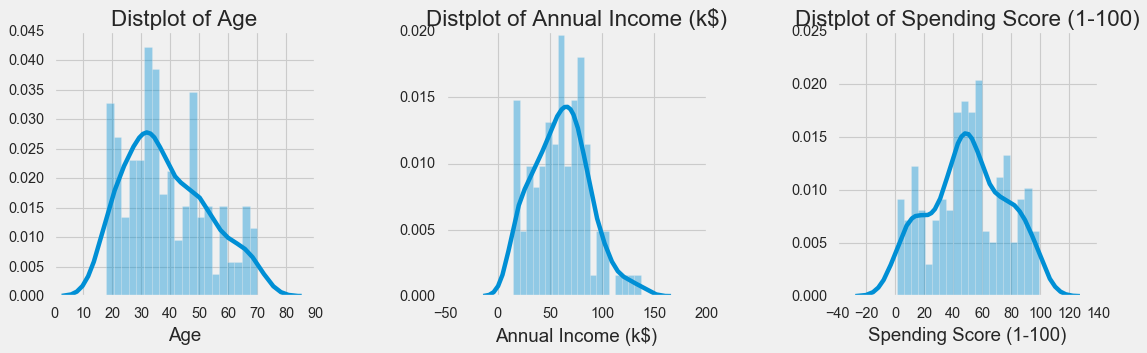

In [305]:
plt.figure(1 , figsize = (15 , 4))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Count Plot of Gender

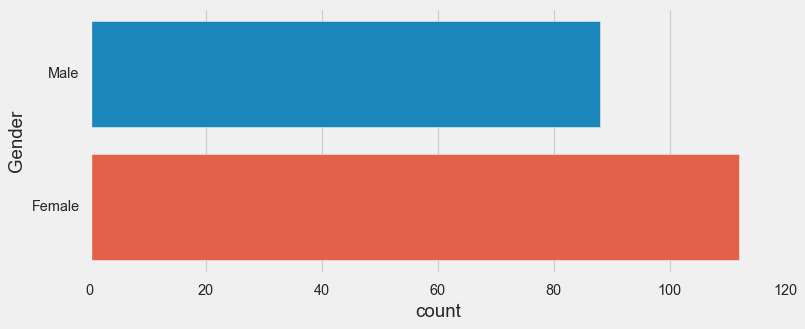

In [306]:
plt.figure(1 , figsize = (10 , 4))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### Ploting the Relation between Age , Annual Income and Spending Score

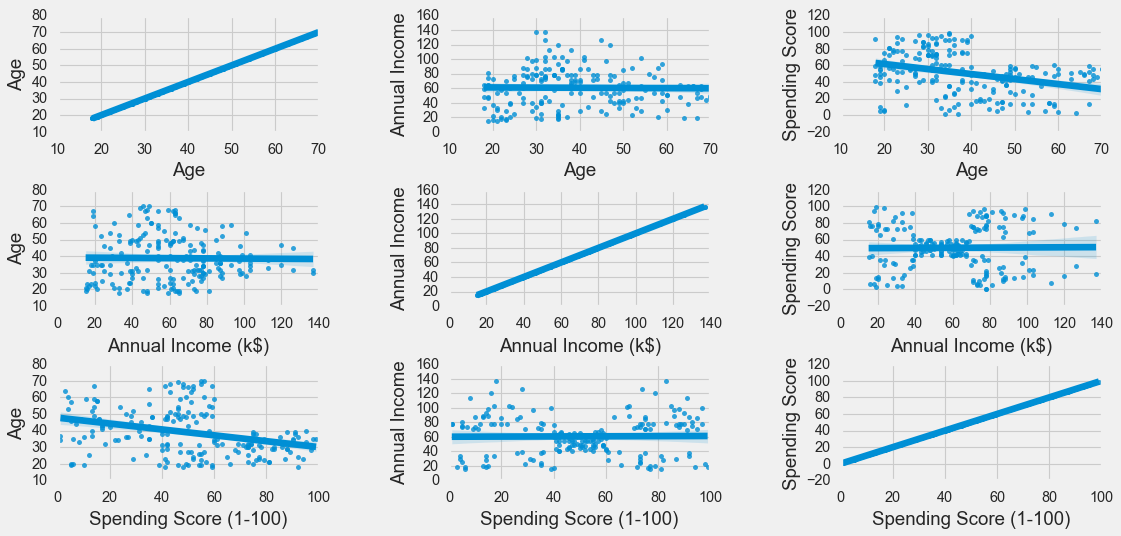

In [307]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

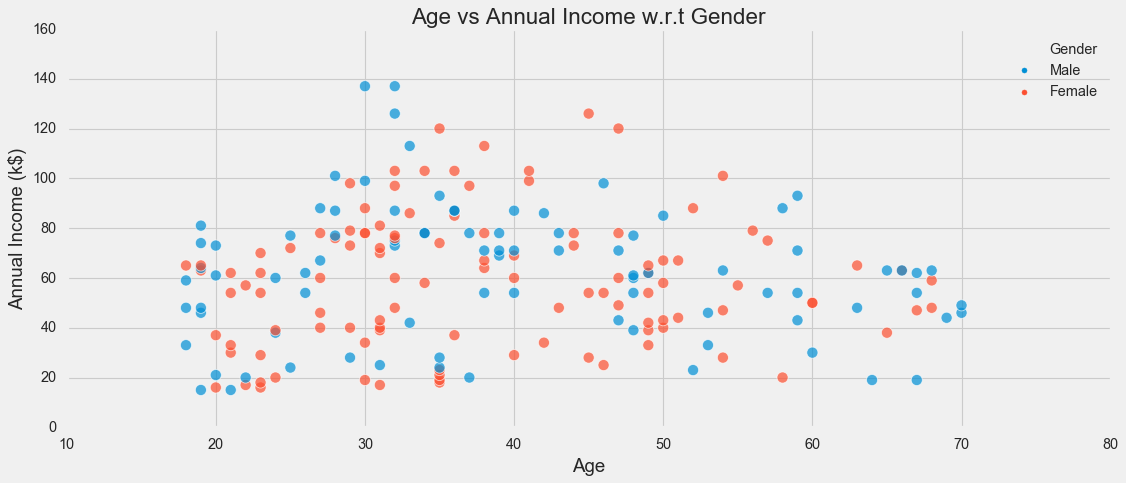

In [308]:
plt.figure(1 , figsize = (15 , 6))
sns.scatterplot(x = 'Age' , y = 'Annual Income (k$)' , data = df , alpha = 0.7 , hue = 'Gender', s=100)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

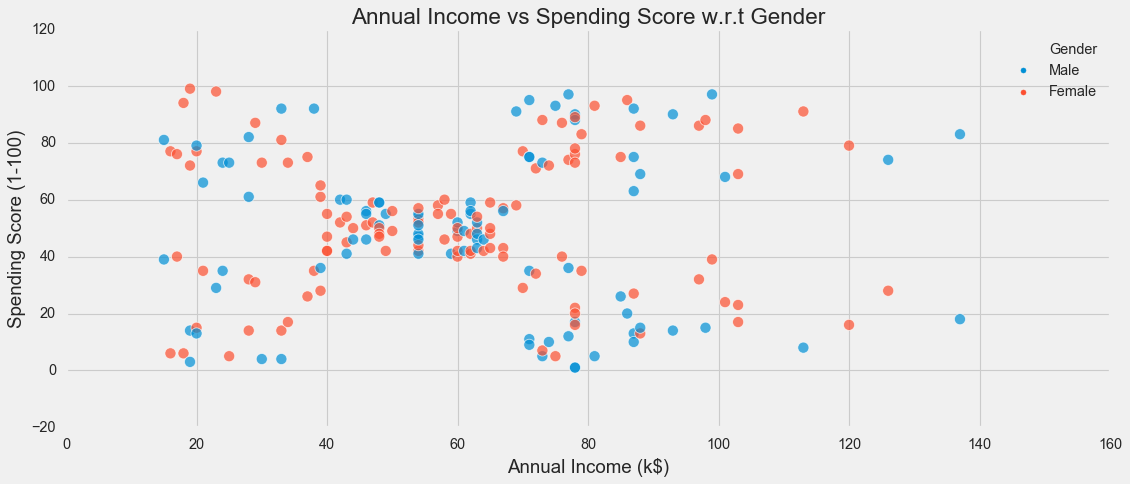

In [309]:
plt.figure(1 , figsize = (15 , 6))
sns.scatterplot(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , data = df , alpha = 0.7 , hue = 'Gender', s=100)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

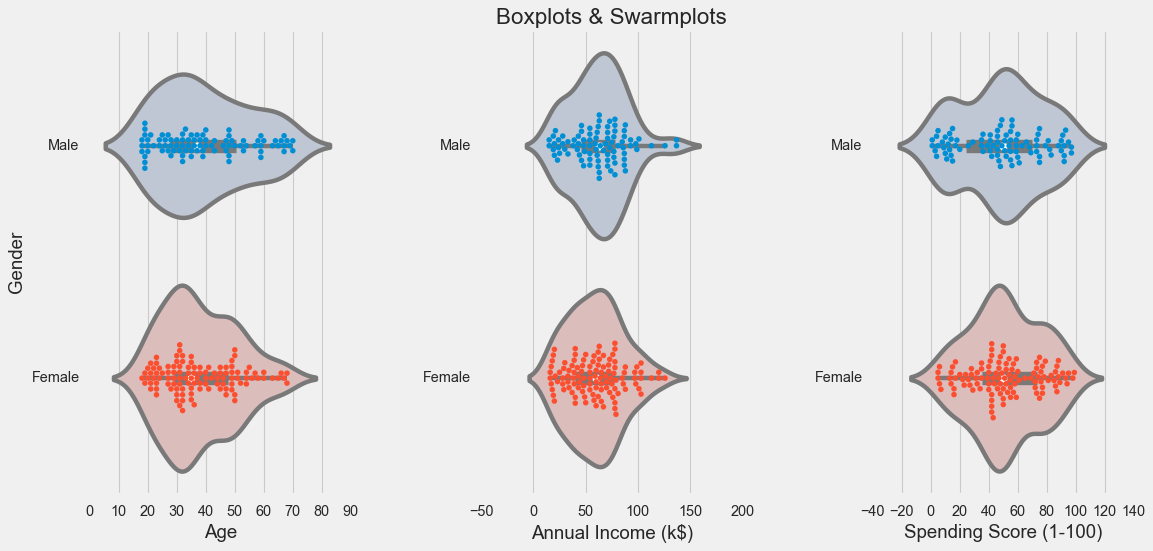

In [310]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Clustering using K- means
### 1.Segmentation using Age and Spending Score

In [311]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

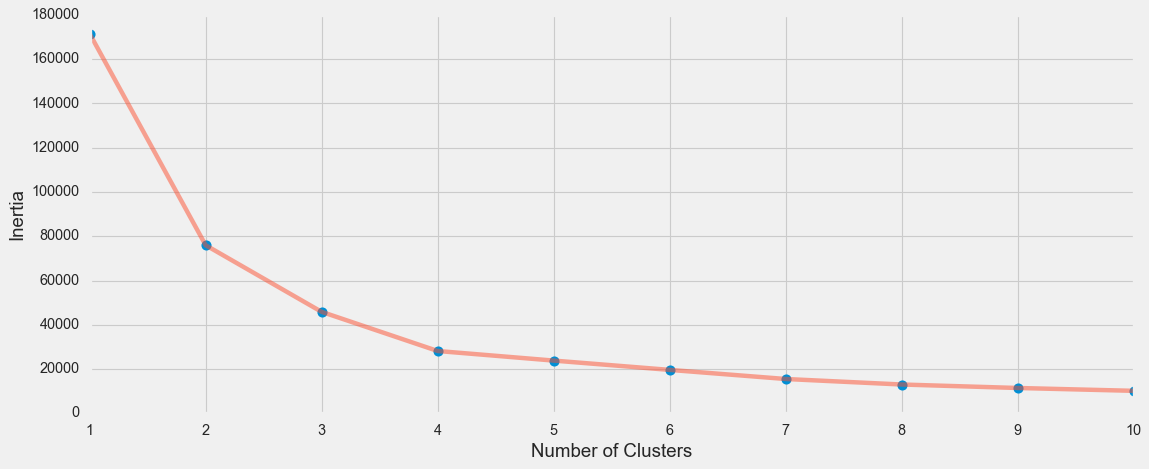

In [312]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [313]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [314]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

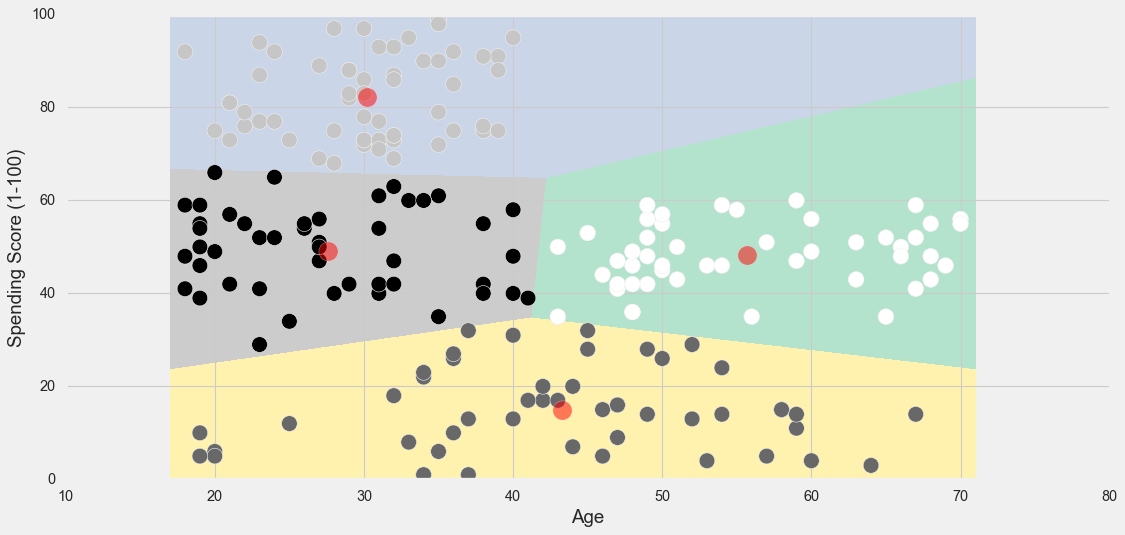

In [315]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , s = 200)


#sns.scatterplot( x = 'Age' ,y = 'Spending Score (1-100)' , data = df ,s=100 )

plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### 2. Segmentation using  Annual Income and Spending Score

In [316]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

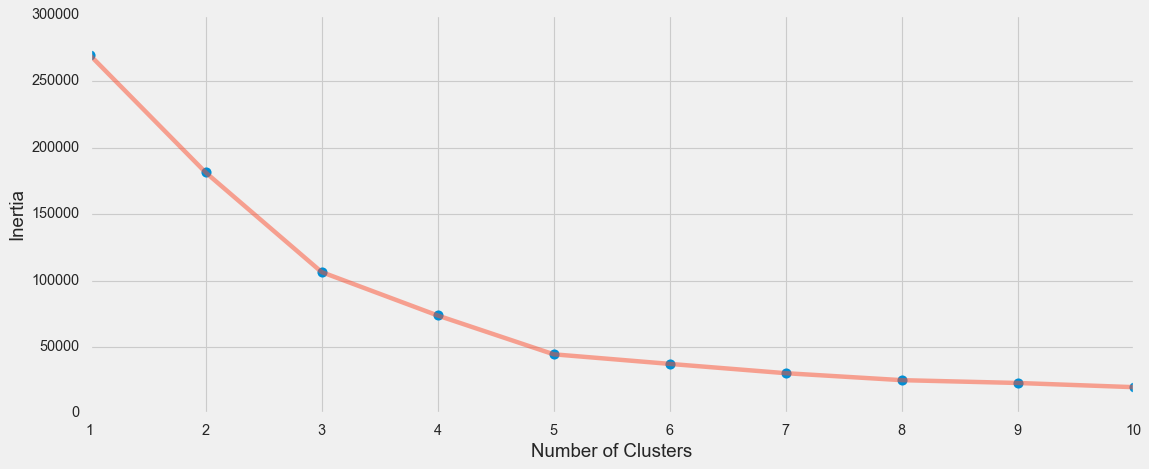

In [317]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [318]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [319]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

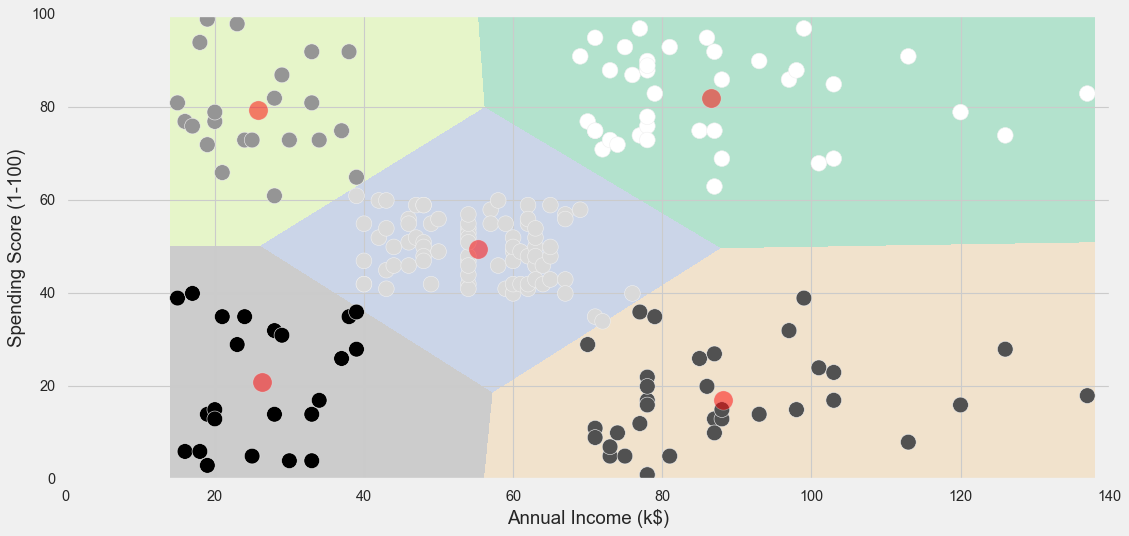

In [320]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

### 3.Segmentation using Age , Annual Income and Spending Score

In [321]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

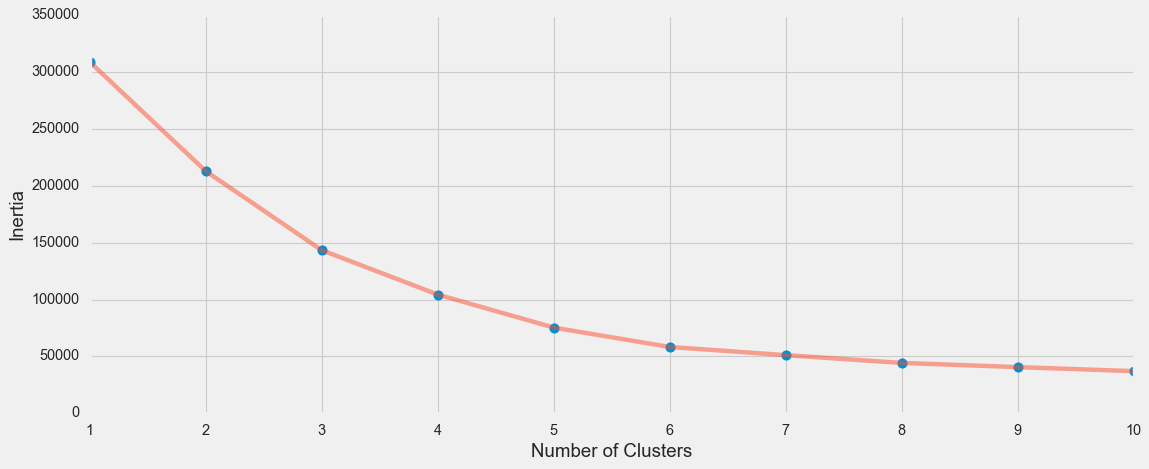

In [322]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [323]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [324]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [326]:
# Cluster interpretation
df['Segment'] = df['label3'].map({0:'First', 1:'Second', 2:'Third',3:'Fourth', 4:'Fifth'})
df.rename(columns = {'label3':'Total'}, inplace = True)
df.groupby(['Segment']).agg(
    {
        'Total':'count',
        'Age': 'mean',
        'Annual Income (k$)': 'mean',
        'Spending Score (1-100)': 'mean'
    }
).reset_index()

,Segment,Total,Age,Annual Income (k$),Spending Score (1-100)
0,Fifth,21,44.143,25.143,19.524
1,First,45,56.156,53.378,49.089
2,Fourth,22,25.273,25.727,79.364
3,Second,39,32.692,86.538,82.128
4,Third,35,41.686,88.229,17.286


#  K Prototype

In [ ]:
#pip install kmodes
#pip install plotline

In [ ]:
# K-prototype


# Import module for data visualization
#from plotnine import *
#import plotnine# Import module for k-protoype cluster


from kmodes.kprototypes import KPrototypes# Ignore warnings


In [ ]:
df_ktype=df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
# Get the position of categorical columns
catColumnsPos = [df_ktype.columns.get_loc(col) for col in list(df_ktype.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_ktype.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

In [ ]:
# Convert dataframe to matrix

dfMatrix = df_ktype.to_numpy()

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

In [ ]:
# Cluster centorid
print(kprototype.cluster_centroids_)

# Check the iteration of the clusters created
print(kprototype.n_iter_)

# Check the cost of the clusters created
print(kprototype.cost_)

print(kprototype.labels_)

In [ ]:
# Add the cluster to the dataframe
df_ktype['Cluster Labels'] = kprototype.labels_
df_ktype['Segment'] = df_ktype['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})

# Order the cluster
df_ktype['Segment'] = df_ktype['Segment'].astype('category')
df_ktype['Segment'] = df_ktype['Segment'].cat.reorder_categories(['First','Second','Third'])

In [ ]:
# Add the cluster to the dataframe
df_ktype['Cluster Labels'] = kprototype.labels_
df_ktype['Segment'] = df_ktype['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third',3:'Fourth', 4:'Fifth'})

# Order the cluster
df_ktype['Segment'] = df_ktype['Segment'].astype('category')
df_ktype['Segment'] = df_ktype['Segment'].cat.reorder_categories(['First','Second','Third','Fourth','Fifth'])

In [ ]:
# Cluster interpretation
df_ktype.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
df_ktype.groupby(['Segment']).agg(
    {
        'Total':'count',
        #'Gender': lambda x: x.value_counts().index[0],
        'Age': 'mean',
        'Annual Income (k$)': 'mean',
        'Spending Score (1-100)': 'mean'
    }
).reset_index()

In [ ]:
# Cluster interpretation
df_ktype.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
df_ktype.groupby(['Segment','Gender']).agg(
    {
        'Total':'count',
        #'Gender': lambda x: x.value_counts().index[0],
        'Age': 'mean',
        'Annual Income (k$)': 'mean',
        'Spending Score (1-100)': 'mean'
    }
).reset_index()